# Team: Hungry Stayers

## 2024 Big Data Health Science Center (BDHSC) Case Competition
Goal: To develop a model to classify discrete segments of unlabeled EEG data into vigilance states with high accuracy.

#### EEG Sleep Dataset
There are 16 files in the stage1 folder. The naming convention for each file is as follows: 0_1.csv, where 0 represents the animal_id and 1 represents the recording_id. For each animal, there are two corresponding files. In total, the dataset comprises the dataset files for 8 rodents (animals).

This dataset is about 3.7 GB (compressed) and it takes about 9.74 GB of space (only stage 1) after the extraction. The dataset is huge, and we need to devise some techniques to preprocess the dataset and prepare it for the training.

#### Data Preprocessing

In [25]:
# load required libraries
import pandas as pd
import numpy as np
from scipy.signal import resample
import os
import matplotlib.pyplot as plt

In [1]:
# DOWNLOAD THE DATASET AND PLACE IT IN THE ROOT DIRECTORY 
!tar -xvzf bdhsc_2024.tar.gz

x bdhsc_2024/
x bdhsc_2024/stage1_labeled/
x bdhsc_2024/stage1_labeled/0_0.csv
x bdhsc_2024/stage1_labeled/7_0.csv
x bdhsc_2024/stage1_labeled/4_1.csv
x bdhsc_2024/stage1_labeled/6_1.csv
x bdhsc_2024/stage1_labeled/3_1.csv
x bdhsc_2024/stage1_labeled/0_1.csv
x bdhsc_2024/stage1_labeled/2_0.csv
x bdhsc_2024/stage1_labeled/6_0.csv
x bdhsc_2024/stage1_labeled/7_1.csv
x bdhsc_2024/stage1_labeled/4_0.csv
x bdhsc_2024/stage1_labeled/1_0.csv
x bdhsc_2024/stage1_labeled/3_0.csv
x bdhsc_2024/stage1_labeled/5_1.csv
x bdhsc_2024/stage1_labeled/5_0.csv
x bdhsc_2024/stage1_labeled/1_1.csv
x bdhsc_2024/stage1_labeled/2_1.csv
x bdhsc_2024/example_scoring.csv
x bdhsc_2024/stage2_unlabeled/
x bdhsc_2024/stage2_unlabeled/8_1.csv
x bdhsc_2024/stage2_unlabeled/8_0.csv
x bdhsc_2024/stage2_unlabeled/13_0.csv
x bdhsc_2024/stage2_unlabeled/11_0.csv
x bdhsc_2024/stage2_unlabeled/9_0.csv
x bdhsc_2024/stage2_unlabeled/14_0.csv
x bdhsc_2024/stage2_unlabeled/12_0.csv
x bdhsc_2024/stage2_unlabeled/14_1.csv
x bdhsc_

In [2]:
# commonly used variables
folder_name = 'bdhsc_2024'
output_folder = 'bdhsc_2024_processed'
stage = 'stage1_labeled'
file_name = '0_0'

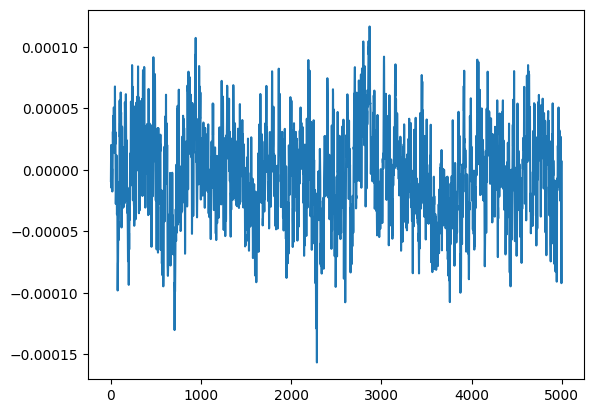

In [26]:
# Have a look at data
df = pd.read_csv(f'{folder_name}/{stage}/{file_name}.csv')
nd1 = df.to_numpy()
plt.plot(nd1[0][:-1])

In [7]:
# Creating the intervals of size 10 from 0 to 4999, because the last column is the Label (target) column
columns_to_include = list(range(0, 5000, 10))
# Need to add the Label (target) column in the sampled dataset
columns_to_include.append(5000)
print(columns_to_include)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430, 1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510, 1520, 1530, 1540, 1550, 1560, 1570, 1580, 1590, 1600, 1610, 1620, 1630, 1640, 1650, 1660, 1670, 1680, 1690, 1700, 1710, 1720, 1730, 1740, 1750, 1760, 1770, 1780, 1790, 1800, 1810, 1820, 1830, 1840, 

In [8]:
# loop through all file 
#file_names =['0_0', '0_1','1_0', '1_1,','2_0', '2_1', '3_0','3_1', '4_0','4_1',]
#file_names =['0_0','0_1','1_0']

# Get a list of all files in the directory
all_files = os.listdir(f'{folder_name}/{stage}')
# Filter files to include only those without extensions
file_names = [file.split('.')[0] for file in all_files if '.' in file]
file_names.sort()
print(file_names)

['0_0', '0_1', '1_0', '1_1', '2_0', '2_1', '3_0', '3_1', '4_0', '4_1', '5_0', '5_1', '6_0', '6_1', '7_0', '7_1']


In [13]:
# Downsampling dataset (This takes about 2-3 minutes)
for i in range(len(file_names)):
    df = pd.read_csv(f'{folder_name}/{stage}/{file_names[i]}.csv')
    
    new_df = df.iloc[:, columns_to_include]
    output_folder_path = os.path.join(output_folder, stage)

    # Create the target directory if it does not exist
    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)

    output_file_path = os.path.join(output_folder_path, f'{file_names[i]}.csv')
    new_df.to_csv(output_file_path, index=False)
    print(f'{i+1}.{file_names[i]}.csv is ready!')
    
print("All file processed!")

1.0_0.csv is ready!
2.0_1.csv is ready!
3.1_0.csv is ready!
4.1_1.csv is ready!
5.2_0.csv is ready!
6.2_1.csv is ready!
7.3_0.csv is ready!
8.3_1.csv is ready!
9.4_0.csv is ready!
10.4_1.csv is ready!
11.5_0.csv is ready!
12.5_1.csv is ready!
13.6_0.csv is ready!
14.6_1.csv is ready!
15.7_0.csv is ready!
16.7_1.csv is ready!
All files processed!


In [19]:
# check for processed file, just for validation
file_name = '0_0'
df = pd.read_csv(f'{output_folder}/{stage}/{file_name}.csv')
df.head()

,0,10,20,30,40,50,60,70,80,90,...,4910,4920,4930,4940,4950,4960,4970,4980,4990,5000
0,-9.079118e-06,-1.304646e-05,1.350423e-05,2.021820e-05,2.708476e-05,3.074693e-05,-7.400626e-06,-1.487755e-05,-6.340124e-05,-2.021820e-05,...,-2.983139e-05,-3.517204e-05,-6.553750e-05,-2.525368e-05,-1.304646e-05,-1.907378e-06,9.536889e-06,-1.029984e-05,-2.693217e-05,2
1,3.150988e-05,2.975509e-06,-2.647440e-05,-4.348821e-06,-8.506905e-05,-5.256733e-05,-8.171206e-05,-1.061265e-04,-3.913939e-05,-1.884489e-05,...,-1.670863e-05,-4.043641e-06,-4.829480e-05,-1.907378e-06,2.235447e-05,-5.455101e-05,-2.677958e-05,-2.952621e-05,-4.463264e-05,2
2,1.144427e-06,-6.637675e-06,-3.288319e-05,-9.132524e-05,-8.369573e-05,-1.884489e-05,7.248035e-06,7.400626e-06,3.364614e-05,-5.455101e-05,...,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,2
3,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,...,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,2
4,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,...,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,2


In [20]:
print(f'Shape: {df.shape}, Size: {df.size}') 

Shape: (8640, 501), Size: 4328640


It has the correct shape and size. Now, we can create the train/test dataset. We plan to use the dataset for animal ids 6 and 7 as the test dataset, while the remaining ones will be used in the training phase.

In [30]:
# List all the dataset files excluding 6 and 7 
directory_path = '/dataset'
source_path = f'{output_folder}/{stage}'

# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(source_path) if file.endswith('.csv')]
csv_files.sort()
csv_files_train = csv_files[0:12] #excluded 6 and 7 for testing
csv_files_test = csv_files[12:18] 
print(csv_files_test)

['6_0.csv', '6_1.csv', '7_0.csv', '7_1.csv']


In [22]:
# Combining the training dataset into a single CSV file (0-5 animal ids)
source_path = f'{output_folder}/{stage}'
if not csv_files_train:
    print("No CSV files found in the specified directory.")
else:
    first_csv_file = os.path.join(source_path, csv_files_train[0])
    first_data = pd.read_csv(first_csv_file, header=None, skiprows=1)

    # Use the column indices as the header
    header = list(range(first_data.shape[1]))

    # Initialize an empty list to store DataFrames
    dfs = []

    # Loop through each CSV file and append its data to the list
    for csv_file in csv_files_train:
        file_path = os.path.join(source_path, csv_file)
        df = pd.read_csv(file_path, header=None, names=header, skiprows=1)
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)

    # Save the combined DataFrame to a new CSV file
    dataset_folder = './dataset'
    # Create the target directory if it does not exist
    if not os.path.exists(dataset_folder):
        os.makedirs(dataset_folder)
        
    # Construct the full output file path
    combined_output_file_path = os.path.join(dataset_folder, 'combined_data.csv')

    # Save the DataFrame to a new CSV file
    combined_df.to_csv(combined_output_file_path, index=False)

The dataset folder will be created with a combined_data.csv file. 

In [23]:
# check for combined file
df = pd.read_csv('./dataset/combined_data.csv')
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
103675,-0.000002,-0.000011,0.000045,0.000014,0.000012,-0.000037,-0.000034,-0.000011,-0.000019,0.000007,...,-0.000039,0.000030,0.000056,0.000004,0.000030,0.000022,0.000018,0.000026,0.000006,2
103676,0.000009,-0.000034,-0.000018,0.000062,0.000006,0.000032,0.000023,-0.000005,0.000015,0.000016,...,-0.000108,-0.000056,-0.000053,-0.000093,-0.000098,-0.000113,-0.000088,-0.000090,-0.000027,2
103677,-0.000057,-0.000081,-0.000007,-0.000006,-0.000052,-0.000128,-0.000128,-0.000159,-0.000129,-0.000095,...,-0.000135,-0.000010,-0.000037,-0.000043,-0.000094,-0.000098,-0.000065,-0.000064,-0.000118,2
103678,-0.000063,-0.000098,-0.000121,-0.000090,-0.000055,-0.000127,-0.000149,-0.000130,-0.000136,-0.000129,...,0.000144,0.000154,0.000128,0.000138,0.000142,0.000177,0.000237,0.000231,0.000235,2
103679,0.000202,0.000174,0.000228,0.000236,0.000134,0.000174,0.000168,0.000154,0.000165,0.000248,...,0.000031,-0.000008,-0.000014,0.000016,0.000040,0.000053,0.000117,0.000062,0.000007,2


In [24]:
print(f'Shape: {df.shape}, Size: {df.size}') 

Shape: (103680, 501), Size: 51943680


In [27]:
# Creating training and testing dataframe
df_train = pd.read_csv('./dataset/combined_data.csv')
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,-9.079118e-06,-1.304646e-05,1.350423e-05,2.021820e-05,2.708476e-05,3.074693e-05,-7.400626e-06,-1.487755e-05,-6.340124e-05,-2.021820e-05,...,-2.983139e-05,-3.517204e-05,-6.553750e-05,-2.525368e-05,-1.304646e-05,-1.907378e-06,9.536889e-06,-1.029984e-05,-2.693217e-05,2
1,3.150988e-05,2.975509e-06,-2.647440e-05,-4.348821e-06,-8.506905e-05,-5.256733e-05,-8.171206e-05,-1.061265e-04,-3.913939e-05,-1.884489e-05,...,-1.670863e-05,-4.043641e-06,-4.829480e-05,-1.907378e-06,2.235447e-05,-5.455101e-05,-2.677958e-05,-2.952621e-05,-4.463264e-05,2
2,1.144427e-06,-6.637675e-06,-3.288319e-05,-9.132524e-05,-8.369573e-05,-1.884489e-05,7.248035e-06,7.400626e-06,3.364614e-05,-5.455101e-05,...,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,2
3,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,...,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,2
4,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,...,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,-7.629511e-08,2


In [32]:
# Combining the test dataset into a single CSV file (6-7 animal ids)
source_path = f'{output_folder}/{stage}'
if not csv_files_test:
    print("No CSV files found in the specified directory.")
else:
    first_csv_file = os.path.join(source_path, csv_files_train[0])
    first_data = pd.read_csv(first_csv_file, header=None, skiprows=1)

    # Use the column indices as the header
    header = list(range(first_data.shape[1]))

    # Initialize an empty list to store DataFrames
    dfs = []

    # Loop through each CSV file and append its data to the list
    for csv_file in csv_files_test:
        file_path = os.path.join(source_path, csv_file)
        df = pd.read_csv(file_path, header=None, names=header, skiprows=1)
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)

    # Save the combined DataFrame to a new CSV file
    dataset_folder = './dataset'
    # Create the target directory if it does not exist
    if not os.path.exists(dataset_folder):
        os.makedirs(dataset_folder)
        
    # Construct the full output file path
    combined_output_file_path = os.path.join(dataset_folder, 'combined_test_data.csv')

    # Save the DataFrame to a new CSV file
    combined_df.to_csv(combined_output_file_path, index=False)

In [33]:
# check for combined test file
df = pd.read_csv('./dataset/combined_test_data.csv')
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
34555,-0.000023,0.000019,0.000004,-0.000043,0.000041,-0.000033,0.000015,-0.000016,0.000020,0.000041,...,0.000042,-0.000014,-0.000027,-0.000007,3.433280e-06,0.000009,0.000007,0.000029,-6.866560e-07,2
34556,-0.000004,-0.000079,-0.000072,0.000005,-0.000043,-0.000002,-0.000030,-0.000018,0.000043,0.000064,...,-0.000057,-0.000051,0.000011,-0.000050,3.257801e-05,-0.000015,0.000020,0.000020,-9.636072e-05,2
34557,0.000004,0.000075,0.000030,-0.000047,0.000020,-0.000018,-0.000043,-0.000032,-0.000021,0.000110,...,0.000132,0.000073,0.000029,-0.000037,-1.853971e-05,0.000027,-0.000023,0.000017,5.653467e-05,2
34558,0.000042,0.000020,0.000021,0.000032,0.000012,-0.000035,-0.000068,-0.000137,-0.000094,-0.000092,...,-0.000005,0.000045,0.000097,-0.000019,-4.280156e-05,-0.000053,-0.000067,-0.000069,-2.983139e-05,2
34559,-0.000034,-0.000002,-0.000052,-0.000004,0.000010,-0.000045,-0.000204,-0.000066,0.000111,0.000071,...,0.000062,0.000061,0.000033,-0.000020,8.392462e-07,-0.000064,0.000031,0.000030,3.196765e-05,2


In [34]:
print(f'Shape: {df.shape}, Size: {df.size}') 

Shape: (34560, 501), Size: 17314560


##### Creating testing dataframe 

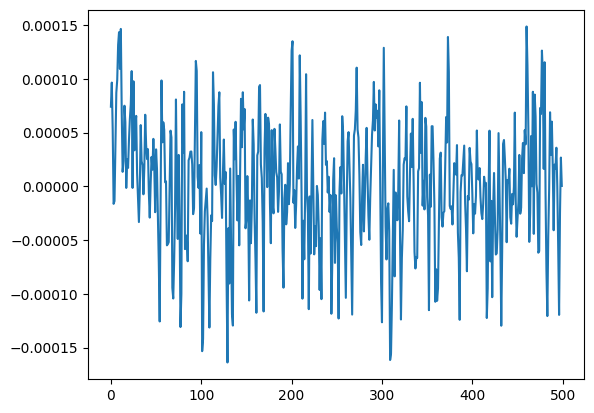

In [37]:
df_test = pd.read_csv('./dataset/combined_test_data.csv')
plt.plot(df_test.to_numpy()[0][:-1])

In [38]:
X_train = df_train.iloc[:,:-1] # exclude last column
y_train = df_train.iloc[:,-1] # only last column
X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]

In [39]:
print(f'X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}, X_test.shape: {X_test.shape}, y_test.shape: {y_test.shape}')

X_train.shape: (103680, 500), y_train.shape: (103680,), X_test.shape: (34560, 500), y_test.shape: (34560,)


In [44]:
# Let's do some maths
24 * 60 * 60 / 10

8640.0

In [41]:
8640 * 2 * 6

103680

In [42]:
8640 * 2 * 2

34560

Yayy! Shape looks good.

## Model Development

### 1. Logistic Regression

In [152]:
from sklearn.linear_model import LogisticRegression
from time import time
from sklearn import metrics

start = time()
lr = LogisticRegression(random_state=1, verbose=1)
lr.fit(X_train,y_train)
end = time()
lr_time = end - start
print('computation time:', lr_time)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


computation time: 2.8272199630737305


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished


In [153]:
y_pred = lr.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy (logistic regression): ', acc)

Accuracy (logistic regression):  0.5157986111111111


In [154]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1663
           1       0.00      0.00      0.00     15071
           2       0.52      1.00      0.68     17826

    accuracy                           0.52     34560
   macro avg       0.17      0.33      0.23     34560
weighted avg       0.27      0.52      0.35     34560



C:\Users\zmy11\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zmy11\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zmy11\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [155]:
print(metrics.confusion_matrix(y_test, y_pred))

[[    0     0  1663]
 [    0     0 15071]
 [    0     0 17826]]


### 2. KNN (K-Nearest Neighbors)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
knn1 = KNeighborsClassifier(n_neighbors=10)
knn1.fit(X_train, y_train)
knn1_pred = knn1.predict(X_test)

In [91]:
metrics.accuracy_score(y_test, knn1_pred)

0.5786458333333333

In [166]:
start = time()
knn2 = KNeighborsClassifier(n_neighbors=20)
knn2.fit(X_train, y_train)

knn2_pred = knn2.predict(X_test)
end = time()
lr_time = end - start
print('computation time:', lr_time)

knn2_acc = metrics.accuracy_score(y_test, knn2_pred)
print(knn2_acc)

computation time: 33.42969536781311
0.588744212962963


In [167]:
print(metrics.confusion_matrix(y_test, knn2_pred))

[[   16    12  1635]
 [    3  3378 11690]
 [   55   818 16953]]


In [168]:
print(metrics.classification_report(y_test, knn2_pred))

              precision    recall  f1-score   support

           0       0.22      0.01      0.02      1663
           1       0.80      0.22      0.35     15071
           2       0.56      0.95      0.70     17826

    accuracy                           0.59     34560
   macro avg       0.53      0.39      0.36     34560
weighted avg       0.65      0.59      0.52     34560



### 3. Random Forest

In [156]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=5000, max_depth=3, random_state=1, n_jobs=-1, verbose=2)
rf.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 5000
building tree 2 of 5000
building tree 3 of 5000
building tree 4 of 5000
building tree 5 of 5000
building tree 6 of 5000
building tree 7 of 5000
building tree 8 of 5000
building tree 9 of 5000
building tree 10 of 5000
building tree 11 of 5000
building tree 12 of 5000
building tree 13 of 5000
building tree 14 of 5000
building tree 15 of 5000
building tree 16 of 5000
building tree 17 of 5000
building tree 18 of 5000building tree 19 of 5000

building tree 20 of 5000
building tree 21 of 5000
building tree 22 of 5000
building tree 23 of 5000
building tree 24 of 5000
building tree 25 of 5000building tree 26 of 5000

building tree 27 of 5000
building tree 28 of 5000
building tree 29 of 5000
building tree 30 of 5000
building tree 31 of 5000
building tree 32 of 5000


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s


building tree 33 of 5000building tree 34 of 5000

building tree 35 of 5000
building tree 36 of 5000
building tree 37 of 5000
building tree 38 of 5000
building tree 39 of 5000
building tree 40 of 5000
building tree 41 of 5000
building tree 42 of 5000building tree 43 of 5000

building tree 44 of 5000
building tree 45 of 5000
building tree 46 of 5000
building tree 47 of 5000
building tree 48 of 5000
building tree 49 of 5000
building tree 50 of 5000
building tree 51 of 5000
building tree 52 of 5000
building tree 53 of 5000
building tree 54 of 5000
building tree 55 of 5000
building tree 56 of 5000
building tree 57 of 5000
building tree 58 of 5000
building tree 59 of 5000
building tree 60 of 5000
building tree 61 of 5000
building tree 62 of 5000
building tree 63 of 5000
building tree 64 of 5000
building tree 65 of 5000
building tree 66 of 5000
building tree 67 of 5000
building tree 68 of 5000
building tree 69 of 5000
building tree 70 of 5000
building tree 71 of 5000
building tree 72 of 5000


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   10.0s


building tree 156 of 5000
building tree 157 of 5000
building tree 158 of 5000
building tree 159 of 5000
building tree 160 of 5000
building tree 161 of 5000
building tree 162 of 5000
building tree 163 of 5000
building tree 164 of 5000
building tree 165 of 5000
building tree 166 of 5000
building tree 167 of 5000
building tree 168 of 5000
building tree 169 of 5000
building tree 170 of 5000
building tree 171 of 5000
building tree 172 of 5000
building tree 173 of 5000
building tree 174 of 5000
building tree 175 of 5000
building tree 176 of 5000
building tree 177 of 5000
building tree 178 of 5000
building tree 179 of 5000
building tree 180 of 5000
building tree 181 of 5000
building tree 182 of 5000
building tree 183 of 5000
building tree 184 of 5000
building tree 185 of 5000
building tree 186 of 5000
building tree 187 of 5000
building tree 188 of 5000
building tree 189 of 5000
building tree 190 of 5000
building tree 191 of 5000
building tree 192 of 5000
building tree 193 of 5000
building tre

[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   25.4s


building tree 357 of 5000
building tree 358 of 5000
building tree 359 of 5000
building tree 360 of 5000
building tree 361 of 5000
building tree 362 of 5000
building tree 363 of 5000
building tree 364 of 5000
building tree 365 of 5000
building tree 366 of 5000
building tree 367 of 5000
building tree 368 of 5000
building tree 369 of 5000
building tree 370 of 5000
building tree 371 of 5000
building tree 372 of 5000
building tree 373 of 5000
building tree 374 of 5000
building tree 375 of 5000
building tree 376 of 5000
building tree 377 of 5000
building tree 378 of 5000
building tree 379 of 5000
building tree 380 of 5000
building tree 381 of 5000
building tree 382 of 5000
building tree 383 of 5000
building tree 384 of 5000
building tree 385 of 5000
building tree 386 of 5000
building tree 387 of 5000
building tree 388 of 5000
building tree 389 of 5000
building tree 390 of 5000
building tree 391 of 5000
building tree 392 of 5000
building tree 393 of 5000
building tree 394 of 5000
building tre

[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   44.1s


building tree 644 of 5000
building tree 645 of 5000
building tree 646 of 5000
building tree 647 of 5000
building tree 648 of 5000
building tree 649 of 5000
building tree 650 of 5000
building tree 651 of 5000
building tree 652 of 5000
building tree 653 of 5000
building tree 654 of 5000
building tree 655 of 5000
building tree 656 of 5000
building tree 657 of 5000
building tree 658 of 5000
building tree 659 of 5000
building tree 660 of 5000
building tree 661 of 5000
building tree 662 of 5000
building tree 663 of 5000
building tree 664 of 5000
building tree 665 of 5000
building tree 666 of 5000
building tree 667 of 5000
building tree 668 of 5000
building tree 669 of 5000
building tree 670 of 5000
building tree 671 of 5000
building tree 672 of 5000
building tree 673 of 5000
building tree 674 of 5000
building tree 675 of 5000
building tree 676 of 5000
building tree 677 of 5000
building tree 678 of 5000
building tree 679 of 5000
building tree 680 of 5000
building tree 681 of 5000
building tre

building tree 961 of 5000
building tree 962 of 5000
building tree 963 of 5000
building tree 964 of 5000
building tree 965 of 5000
building tree 966 of 5000
building tree 967 of 5000
building tree 968 of 5000
building tree 969 of 5000
building tree 970 of 5000
building tree 971 of 5000
building tree 972 of 5000
building tree 973 of 5000
building tree 974 of 5000
building tree 975 of 5000
building tree 976 of 5000
building tree 977 of 5000
building tree 978 of 5000
building tree 979 of 5000
building tree 980 of 5000
building tree 981 of 5000
building tree 982 of 5000
building tree 983 of 5000
building tree 984 of 5000
building tree 985 of 5000
building tree 986 of 5000
building tree 987 of 5000
building tree 988 of 5000
building tree 989 of 5000
building tree 990 of 5000
building tree 991 of 5000
building tree 992 of 5000
building tree 993 of 5000
building tree 994 of 5000
building tree 995 of 5000
building tree 996 of 5000
building tree 997 of 5000
building tree 998 of 5000
building tre

[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.2min


building tree 1009 of 5000
building tree 1010 of 5000
building tree 1011 of 5000
building tree 1012 of 5000building tree 1013 of 5000

building tree 1014 of 5000
building tree 1015 of 5000
building tree 1016 of 5000
building tree 1017 of 5000
building tree 1018 of 5000
building tree 1019 of 5000
building tree 1020 of 5000
building tree 1021 of 5000
building tree 1022 of 5000
building tree 1023 of 5000
building tree 1024 of 5000
building tree 1025 of 5000
building tree 1026 of 5000
building tree 1027 of 5000
building tree 1028 of 5000
building tree 1029 of 5000
building tree 1030 of 5000
building tree 1031 of 5000
building tree 1032 of 5000
building tree 1033 of 5000
building tree 1034 of 5000
building tree 1035 of 5000
building tree 1036 of 5000
building tree 1037 of 5000
building tree 1038 of 5000
building tree 1039 of 5000
building tree 1040 of 5000
building tree 1041 of 5000
building tree 1042 of 5000
building tree 1043 of 5000
building tree 1044 of 5000
building tree 1045 of 5000
b

building tree 1313 of 5000
building tree 1314 of 5000
building tree 1315 of 5000
building tree 1316 of 5000
building tree 1317 of 5000
building tree 1318 of 5000
building tree 1319 of 5000
building tree 1320 of 5000
building tree 1321 of 5000
building tree 1322 of 5000
building tree 1323 of 5000
building tree 1324 of 5000
building tree 1325 of 5000
building tree 1326 of 5000
building tree 1327 of 5000
building tree 1328 of 5000
building tree 1329 of 5000
building tree 1330 of 5000
building tree 1331 of 5000
building tree 1332 of 5000
building tree 1333 of 5000
building tree 1334 of 5000
building tree 1335 of 5000
building tree 1336 of 5000
building tree 1337 of 5000
building tree 1338 of 5000
building tree 1339 of 5000
building tree 1340 of 5000
building tree 1341 of 5000
building tree 1342 of 5000
building tree 1343 of 5000
building tree 1344 of 5000
building tree 1345 of 5000
building tree 1346 of 5000
building tree 1347 of 5000
building tree 1348 of 5000
building tree 1349 of 5000
b

[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.7min


building tree 1451 of 5000
building tree 1452 of 5000
building tree 1453 of 5000
building tree 1454 of 5000
building tree 1455 of 5000
building tree 1456 of 5000
building tree 1457 of 5000
building tree 1458 of 5000
building tree 1459 of 5000
building tree 1460 of 5000
building tree 1461 of 5000
building tree 1462 of 5000
building tree 1463 of 5000
building tree 1464 of 5000
building tree 1465 of 5000
building tree 1466 of 5000
building tree 1467 of 5000
building tree 1468 of 5000
building tree 1469 of 5000
building tree 1470 of 5000
building tree 1471 of 5000
building tree 1472 of 5000
building tree 1473 of 5000
building tree 1474 of 5000
building tree 1475 of 5000
building tree 1476 of 5000
building tree 1477 of 5000
building tree 1478 of 5000
building tree 1479 of 5000
building tree 1480 of 5000
building tree 1481 of 5000
building tree 1482 of 5000
building tree 1483 of 5000
building tree 1484 of 5000
building tree 1485 of 5000
building tree 1486 of 5000
building tree 1487 of 5000
b

building tree 1759 of 5000
building tree 1760 of 5000
building tree 1761 of 5000
building tree 1762 of 5000
building tree 1763 of 5000
building tree 1764 of 5000
building tree 1765 of 5000
building tree 1766 of 5000
building tree 1767 of 5000
building tree 1768 of 5000
building tree 1769 of 5000
building tree 1770 of 5000
building tree 1771 of 5000
building tree 1772 of 5000
building tree 1773 of 5000
building tree 1774 of 5000
building tree 1775 of 5000
building tree 1776 of 5000
building tree 1777 of 5000
building tree 1778 of 5000
building tree 1779 of 5000
building tree 1780 of 5000
building tree 1781 of 5000
building tree 1782 of 5000
building tree 1783 of 5000
building tree 1784 of 5000
building tree 1785 of 5000
building tree 1786 of 5000
building tree 1787 of 5000
building tree 1788 of 5000
building tree 1789 of 5000
building tree 1790 of 5000
building tree 1791 of 5000
building tree 1792 of 5000
building tree 1793 of 5000
building tree 1794 of 5000
building tree 1795 of 5000
b

[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  2.3min


building tree 1978 of 5000
building tree 1979 of 5000
building tree 1980 of 5000
building tree 1981 of 5000
building tree 1982 of 5000
building tree 1983 of 5000
building tree 1984 of 5000
building tree 1985 of 5000
building tree 1986 of 5000
building tree 1987 of 5000building tree 1988 of 5000

building tree 1989 of 5000
building tree 1990 of 5000
building tree 1991 of 5000
building tree 1992 of 5000
building tree 1993 of 5000
building tree 1994 of 5000
building tree 1995 of 5000
building tree 1996 of 5000
building tree 1997 of 5000
building tree 1998 of 5000
building tree 1999 of 5000
building tree 2000 of 5000
building tree 2001 of 5000
building tree 2002 of 5000
building tree 2003 of 5000
building tree 2004 of 5000
building tree 2005 of 5000
building tree 2006 of 5000
building tree 2007 of 5000
building tree 2008 of 5000
building tree 2009 of 5000
building tree 2010 of 5000
building tree 2011 of 5000
building tree 2012 of 5000
building tree 2013 of 5000
building tree 2014 of 5000
b

building tree 2283 of 5000
building tree 2284 of 5000
building tree 2285 of 5000
building tree 2286 of 5000
building tree 2287 of 5000
building tree 2288 of 5000
building tree 2289 of 5000
building tree 2290 of 5000
building tree 2291 of 5000
building tree 2292 of 5000
building tree 2293 of 5000
building tree 2294 of 5000
building tree 2295 of 5000
building tree 2296 of 5000
building tree 2297 of 5000
building tree 2298 of 5000
building tree 2299 of 5000
building tree 2300 of 5000
building tree 2301 of 5000
building tree 2302 of 5000
building tree 2303 of 5000
building tree 2304 of 5000
building tree 2305 of 5000
building tree 2306 of 5000
building tree 2307 of 5000
building tree 2308 of 5000
building tree 2309 of 5000
building tree 2310 of 5000
building tree 2311 of 5000
building tree 2312 of 5000
building tree 2313 of 5000
building tree 2314 of 5000
building tree 2315 of 5000
building tree 2316 of 5000
building tree 2317 of 5000
building tree 2318 of 5000
building tree 2319 of 5000
b

[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  3.1min


building tree 2587 of 5000
building tree 2588 of 5000
building tree 2589 of 5000
building tree 2590 of 5000
building tree 2591 of 5000
building tree 2592 of 5000
building tree 2593 of 5000
building tree 2594 of 5000
building tree 2595 of 5000
building tree 2596 of 5000
building tree 2597 of 5000
building tree 2598 of 5000
building tree 2599 of 5000
building tree 2600 of 5000
building tree 2601 of 5000
building tree 2602 of 5000
building tree 2603 of 5000
building tree 2604 of 5000
building tree 2605 of 5000
building tree 2606 of 5000
building tree 2607 of 5000
building tree 2608 of 5000
building tree 2609 of 5000
building tree 2610 of 5000
building tree 2611 of 5000
building tree 2612 of 5000
building tree 2613 of 5000
building tree 2614 of 5000
building tree 2615 of 5000
building tree 2616 of 5000
building tree 2617 of 5000
building tree 2618 of 5000
building tree 2619 of 5000
building tree 2620 of 5000
building tree 2621 of 5000
building tree 2622 of 5000
building tree 2623 of 5000
b

building tree 2893 of 5000
building tree 2894 of 5000
building tree 2895 of 5000
building tree 2896 of 5000
building tree 2897 of 5000
building tree 2898 of 5000
building tree 2899 of 5000
building tree 2900 of 5000
building tree 2901 of 5000
building tree 2902 of 5000
building tree 2903 of 5000
building tree 2904 of 5000
building tree 2905 of 5000
building tree 2906 of 5000
building tree 2907 of 5000
building tree 2908 of 5000
building tree 2909 of 5000
building tree 2910 of 5000
building tree 2911 of 5000
building tree 2912 of 5000
building tree 2913 of 5000
building tree 2914 of 5000
building tree 2915 of 5000
building tree 2916 of 5000
building tree 2917 of 5000
building tree 2918 of 5000
building tree 2919 of 5000
building tree 2920 of 5000
building tree 2921 of 5000
building tree 2922 of 5000
building tree 2923 of 5000
building tree 2924 of 5000
building tree 2925 of 5000
building tree 2926 of 5000
building tree 2927 of 5000
building tree 2928 of 5000
building tree 2929 of 5000
b

building tree 3201 of 5000
building tree 3202 of 5000
building tree 3203 of 5000
building tree 3204 of 5000
building tree 3205 of 5000
building tree 3206 of 5000
building tree 3207 of 5000
building tree 3208 of 5000
building tree 3209 of 5000
building tree 3210 of 5000
building tree 3211 of 5000
building tree 3212 of 5000
building tree 3213 of 5000
building tree 3214 of 5000
building tree 3215 of 5000
building tree 3216 of 5000
building tree 3217 of 5000
building tree 3218 of 5000
building tree 3219 of 5000
building tree 3220 of 5000
building tree 3221 of 5000
building tree 3222 of 5000
building tree 3223 of 5000
building tree 3224 of 5000
building tree 3225 of 5000
building tree 3226 of 5000
building tree 3227 of 5000
building tree 3228 of 5000
building tree 3229 of 5000
building tree 3230 of 5000
building tree 3231 of 5000
building tree 3232 of 5000
building tree 3233 of 5000
building tree 3234 of 5000
building tree 3235 of 5000
building tree 3236 of 5000
building tree 3237 of 5000
b

[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  3.9min


building tree 3275 of 5000
building tree 3276 of 5000
building tree 3277 of 5000
building tree 3278 of 5000
building tree 3279 of 5000
building tree 3280 of 5000
building tree 3281 of 5000
building tree 3282 of 5000
building tree 3283 of 5000
building tree 3284 of 5000
building tree 3285 of 5000
building tree 3286 of 5000
building tree 3287 of 5000
building tree 3288 of 5000
building tree 3289 of 5000
building tree 3290 of 5000
building tree 3291 of 5000
building tree 3292 of 5000
building tree 3293 of 5000
building tree 3294 of 5000
building tree 3295 of 5000
building tree 3296 of 5000
building tree 3297 of 5000
building tree 3298 of 5000
building tree 3299 of 5000
building tree 3300 of 5000
building tree 3301 of 5000
building tree 3302 of 5000
building tree 3303 of 5000
building tree 3304 of 5000
building tree 3305 of 5000
building tree 3306 of 5000
building tree 3307 of 5000
building tree 3308 of 5000
building tree 3309 of 5000
building tree 3310 of 5000
building tree 3311 of 5000
b

building tree 3582 of 5000
building tree 3583 of 5000
building tree 3584 of 5000
building tree 3585 of 5000
building tree 3586 of 5000
building tree 3587 of 5000
building tree 3588 of 5000
building tree 3589 of 5000
building tree 3590 of 5000
building tree 3591 of 5000
building tree 3592 of 5000
building tree 3593 of 5000
building tree 3594 of 5000
building tree 3595 of 5000
building tree 3596 of 5000
building tree 3597 of 5000
building tree 3598 of 5000
building tree 3599 of 5000
building tree 3600 of 5000
building tree 3601 of 5000
building tree 3602 of 5000
building tree 3603 of 5000
building tree 3604 of 5000
building tree 3605 of 5000
building tree 3606 of 5000
building tree 3607 of 5000
building tree 3608 of 5000
building tree 3609 of 5000
building tree 3610 of 5000
building tree 3611 of 5000
building tree 3612 of 5000
building tree 3613 of 5000
building tree 3614 of 5000
building tree 3615 of 5000
building tree 3616 of 5000
building tree 3617 of 5000
building tree 3618 of 5000
b

building tree 3887 of 5000
building tree 3888 of 5000
building tree 3889 of 5000
building tree 3890 of 5000
building tree 3891 of 5000
building tree 3892 of 5000
building tree 3893 of 5000
building tree 3894 of 5000
building tree 3895 of 5000
building tree 3896 of 5000
building tree 3897 of 5000
building tree 3898 of 5000
building tree 3899 of 5000
building tree 3900 of 5000
building tree 3901 of 5000
building tree 3902 of 5000
building tree 3903 of 5000
building tree 3904 of 5000
building tree 3905 of 5000
building tree 3906 of 5000
building tree 3907 of 5000
building tree 3908 of 5000
building tree 3909 of 5000
building tree 3910 of 5000
building tree 3911 of 5000
building tree 3912 of 5000
building tree 3913 of 5000
building tree 3914 of 5000
building tree 3915 of 5000
building tree 3916 of 5000
building tree 3917 of 5000
building tree 3918 of 5000
building tree 3919 of 5000
building tree 3920 of 5000
building tree 3921 of 5000
building tree 3922 of 5000
building tree 3923 of 5000
b

[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  4.9min


building tree 4043 of 5000
building tree 4044 of 5000
building tree 4045 of 5000
building tree 4046 of 5000
building tree 4047 of 5000
building tree 4048 of 5000
building tree 4049 of 5000
building tree 4050 of 5000
building tree 4051 of 5000
building tree 4052 of 5000
building tree 4053 of 5000
building tree 4054 of 5000
building tree 4055 of 5000
building tree 4056 of 5000
building tree 4057 of 5000
building tree 4058 of 5000
building tree 4059 of 5000
building tree 4060 of 5000
building tree 4061 of 5000
building tree 4062 of 5000
building tree 4063 of 5000
building tree 4064 of 5000
building tree 4065 of 5000
building tree 4066 of 5000
building tree 4067 of 5000
building tree 4068 of 5000
building tree 4069 of 5000
building tree 4070 of 5000
building tree 4071 of 5000
building tree 4072 of 5000
building tree 4073 of 5000
building tree 4074 of 5000
building tree 4075 of 5000
building tree 4076 of 5000
building tree 4077 of 5000
building tree 4078 of 5000
building tree 4079 of 5000
b

building tree 4350 of 5000
building tree 4351 of 5000
building tree 4352 of 5000
building tree 4353 of 5000
building tree 4354 of 5000
building tree 4355 of 5000
building tree 4356 of 5000
building tree 4357 of 5000
building tree 4358 of 5000
building tree 4359 of 5000
building tree 4360 of 5000
building tree 4361 of 5000
building tree 4362 of 5000
building tree 4363 of 5000
building tree 4364 of 5000
building tree 4365 of 5000
building tree 4366 of 5000
building tree 4367 of 5000
building tree 4368 of 5000
building tree 4369 of 5000
building tree 4370 of 5000
building tree 4371 of 5000
building tree 4372 of 5000
building tree 4373 of 5000
building tree 4374 of 5000
building tree 4375 of 5000
building tree 4376 of 5000
building tree 4377 of 5000
building tree 4378 of 5000
building tree 4379 of 5000
building tree 4380 of 5000
building tree 4381 of 5000
building tree 4382 of 5000
building tree 4383 of 5000
building tree 4384 of 5000
building tree 4385 of 5000
building tree 4386 of 5000
b

building tree 4654 of 5000
building tree 4655 of 5000
building tree 4656 of 5000
building tree 4657 of 5000
building tree 4658 of 5000
building tree 4659 of 5000
building tree 4660 of 5000
building tree 4661 of 5000
building tree 4662 of 5000
building tree 4663 of 5000
building tree 4664 of 5000
building tree 4665 of 5000
building tree 4666 of 5000
building tree 4667 of 5000
building tree 4668 of 5000
building tree 4669 of 5000
building tree 4670 of 5000
building tree 4671 of 5000
building tree 4672 of 5000
building tree 4673 of 5000
building tree 4674 of 5000
building tree 4675 of 5000
building tree 4676 of 5000
building tree 4677 of 5000
building tree 4678 of 5000
building tree 4679 of 5000
building tree 4680 of 5000
building tree 4681 of 5000
building tree 4682 of 5000
building tree 4683 of 5000
building tree 4684 of 5000
building tree 4685 of 5000
building tree 4686 of 5000
building tree 4687 of 5000
building tree 4688 of 5000
building tree 4689 of 5000
building tree 4690 of 5000
b

[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  6.2min


building tree 4894 of 5000
building tree 4895 of 5000
building tree 4896 of 5000
building tree 4897 of 5000
building tree 4898 of 5000
building tree 4899 of 5000
building tree 4900 of 5000
building tree 4901 of 5000
building tree 4902 of 5000
building tree 4903 of 5000
building tree 4904 of 5000
building tree 4905 of 5000
building tree 4906 of 5000
building tree 4907 of 5000
building tree 4908 of 5000
building tree 4909 of 5000
building tree 4910 of 5000
building tree 4911 of 5000
building tree 4912 of 5000
building tree 4913 of 5000
building tree 4914 of 5000
building tree 4915 of 5000
building tree 4916 of 5000
building tree 4917 of 5000
building tree 4918 of 5000
building tree 4919 of 5000
building tree 4920 of 5000
building tree 4921 of 5000
building tree 4922 of 5000
building tree 4923 of 5000
building tree 4924 of 5000
building tree 4925 of 5000
building tree 4926 of 5000
building tree 4927 of 5000
building tree 4928 of 5000
building tree 4929 of 5000
building tree 4930 of 5000
b

[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  6.4min finished


RandomForestClassifier(max_depth=3, n_estimators=5000, n_jobs=-1,
                       random_state=1, verbose=2)

In [162]:
rf_pred = rf.predict(X_test)
rf_acc = metrics.accuracy_score(y_test, rf_pred)
print('Accuracy (random forest): ', rf_acc)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 997 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 1442 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 1969 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 2576 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 3265 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 4034 tasks      | elapsed:    1.8s


Accuracy (random forest):  0.7973668981481481


[Parallel(n_jobs=8)]: Done 4885 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done 5000 out of 5000 | elapsed:    2.3s finished


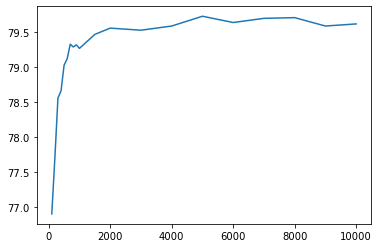

In [147]:
x_ax = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
y_ax = [76.9, 77.7, 78.56, 78.66, 79.03, 79.12, 79.33, 79.29, 79.32, 79.27, 79.47, 79.56, 79.53, 79.59, 79.73, 79.64, 79.7, 79.71, 79.59, 79.62]

plt.plot(x_ax, y_ax)

In [163]:
print(metrics.confusion_matrix(y_test, rf_pred))

[[    0   321  1342]
 [    0 12748  2323]
 [    0  3017 14809]]


In [164]:
print(metrics.classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1663
           1       0.79      0.85      0.82     15071
           2       0.80      0.83      0.82     17826

    accuracy                           0.80     34560
   macro avg       0.53      0.56      0.54     34560
weighted avg       0.76      0.80      0.78     34560



C:\Users\zmy11\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zmy11\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zmy11\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 4. Neural Networks

In [ ]:
!pip install protobuf==3.20.*

In [ ]:
# Convert labels to one-hot vector
from keras.utils import to_categorical

num_labels = len(np.unique(y_train))
y_train2 = to_categorical(y_train, num_labels)
y_test2 = to_categorical(y_test, num_labels)

print(y_train2.shape)
print(y_test2.shape)

(103680, 3)
(34560, 3)


In [ ]:
import keras

dim_in = X_train.shape[1]

dnn1 = keras.Sequential()
dnn1.add(keras.layers.Dense(256, activation="sigmoid", input_shape=(dim_in,)))
dnn1.add(keras.layers.Dense(128, activation="sigmoid"))
dnn1.add(keras.layers.Dense(64, activation="sigmoid"))
dnn1.add(keras.layers.Dense(3, activation="softmax"))

dnn1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 256)               128256    
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dense_20 (Dense)            (None, 64)                8256      
                                                                 
 dense_21 (Dense)            (None, 3)                 195       
                                                                 
Total params: 169603 (662.51 KB)
Trainable params: 169603 (662.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
dnn1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
from time import time
batch_size = 64
num_epochs = 50

start = time()
dnn1.fit(X_train, y_train2, epochs=num_epochs, batch_size=batch_size)
end = time()
print(f'Total computation time: {(end - start) / 60:.0f}min')

Epoch 1/50
1620/1620 [==============================] - 8s 4ms/step - loss: 0.8790 - accuracy: 0.4959 - precision_5: 0.5031 - recall_5: 0.3472
Epoch 2/50
1620/1620 [==============================] - 6s 4ms/step - loss: 0.8736 - accuracy: 0.4974 - precision_5: 0.5056 - recall_5: 0.3397
Epoch 3/50
1620/1620 [==============================] - 5s 3ms/step - loss: 0.8735 - accuracy: 0.4992 - precision_5: 0.5057 - recall_5: 0.3378
Epoch 4/50
1620/1620 [==============================] - 6s 4ms/step - loss: 0.8734 - accuracy: 0.4993 - precision_5: 0.5064 - recall_5: 0.3491
Epoch 5/50
1620/1620 [==============================] - 6s 3ms/step - loss: 0.8744 - accuracy: 0.4942 - precision_5: 0.5035 - recall_5: 0.3265
Epoch 6/50
1620/1620 [==============================] - 6s 4ms/step - loss: 0.8738 - accuracy: 0.4971 - precision_5: 0.5051 - recall_5: 0.3387
Epoch 7/50
1620/1620 [==============================] - 6s 4ms/step - loss: 0.8741 - accuracy: 0.4967 - precision_5: 0.5047 - recall_5: 0.3383

In [ ]:
dnn1.evaluate(X_test, y_test2, batch_size=batch_size)

540/540 [==============================] - 2s 3ms/step - loss: 0.8509 - accuracy: 0.5158


[0.8508700728416443, 0.5157986283302307]

### 5. Simple RNN (Recurrent Neural Network)

In [94]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(1, 500)))
model.add(Dense(units=1, activation='sigmoid'))  # Assuming binary classification, adjust for multi-class

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/100


2024-01-27 00:16:14.715499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc

212/216 [============================>.] - ETA: 0s - loss: -2.4175 - accuracy: 0.4362

2024-01-27 00:16:17.238537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'


216/216 [==============================] - 3s 13ms/step - loss: -2.5009 - accuracy: 0.4356 - val_loss: -6.4119 - val_accuracy: 0.4282
Epoch 2/100
216/216 [==============================] - 2s 11ms/step - loss: -15.0288 - accuracy: 0.4424 - val_loss: -26.5016 - val_accuracy: 0.4282
Epoch 3/100
216/216 [==============================] - 2s 12ms/step - loss: -46.3292 - accuracy: 0.4424 - val_loss: -67.1670 - val_accuracy: 0.4282
Epoch 4/100
216/216 [==============================] - 3s 12ms/step - loss: -99.1942 - accuracy: 0.4424 - val_loss: -128.5402 - val_accuracy: 0.4282
Epoch 5/100
216/216 [==============================] - 2s 11ms/step - loss: -175.3186 - accuracy: 0.4424 - val_loss: -213.5520 - val_accuracy: 0.4282
Epoch 6/100
216/216 [==============================] - 2s 11ms/step - loss: -272.5459 - accuracy: 0.4424 - val_loss: -315.9896 - val_accuracy: 0.4282
Epoch 7/100
216/216 [==============================] - 2s 11ms/step - loss: -388.2312 - accuracy: 0.4424 - val_loss: -436

In [ ]:
# Storing model for later use
model.save('models/rnn_model.h5')

In [4]:
from tensorflow.keras.models import load_model
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

rnn = load_model('models/rnn_model.h5')

output_folder = 'bdhsc_2024_processed'
stage = 'stage1_labeled'
file_name = '7_0'

df = pd.read_csv(f'{output_folder}/{stage}/{file_name}.csv')

# Extract features and labels
X_test = df.iloc[:, :-1].values  # Features (all columns except the last one)
y_test = df.iloc[:, -1].values   # Labels (last column)

# Reshape features for RNN input (assuming you want to use a SimpleRNN)
# The input shape is [batch_size, time_steps, features]
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Make predictions using the loaded model
y_pred = rnn.predict(X_test_reshaped)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

num_classes = len(precision)
for class_label in range(3):
    print(f"\nMetrics for Class {class_label}:")
    print(f"Precision: {precision[class_label]:.4f}")
    print(f"Recall: {recall[class_label]:.4f}")
    print(f"F1 Score: {f1[class_label]:.4f}")

# Step 4: Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# You can also display a classification report for additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

 39/270 [===>..........................] - ETA: 0s

2024-01-27 03:59:29.165116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


270/270 [==============================] - 1s 4ms/step
Precision: [0.         0.36180556 0.        ]
Recall: [0. 1. 0.]
F1 Score: [0.         0.53136155 0.        ]

Metrics for Class 0:
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Metrics for Class 1:
Precision: 0.3618
Recall: 1.0000
F1 Score: 0.5314

Metrics for Class 2:
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Confusion Matrix:
[[   0  334    0]
 [   0 3126    0]
 [   0 5180    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       334
           1       0.36      1.00      0.53      3126
           2       0.00      0.00      0.00      5180

    accuracy                           0.36      8640
   macro avg       0.12      0.33      0.18      8640
weighted avg       0.13      0.36      0.19      8640



/Users/sagar/opt/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sagar/opt/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sagar/opt/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/s

### 6. Simple LSTM

In [118]:
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(1, 500), kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))  # Adjust the dropout rate as needed
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32,
          validation_data=(X_test_reshaped, y_test), callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/100


2024-01-27 02:06:38.710862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc

  4/216 [..............................] - ETA: 4s - loss: 3.4399 - accuracy: 0.3203  

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'


215/216 [============================>.] - ETA: 0s - loss: 2.8269 - accuracy: 0.3506

2024-01-27 02:06:42.070526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'


216/216 [==============================] - 5s 22ms/step - loss: 2.8249 - accuracy: 0.3507 - val_loss: 2.6455 - val_accuracy: 0.3618
Epoch 2/100
216/216 [==============================] - 5s 21ms/step - loss: 1.9000 - accuracy: 0.4136 - val_loss: 2.0799 - val_accuracy: 0.3618
Epoch 3/100
216/216 [==============================] - 4s 20ms/step - loss: 1.2320 - accuracy: 0.4329 - val_loss: 1.7070 - val_accuracy: 0.3618
Epoch 4/100
216/216 [==============================] - 4s 20ms/step - loss: 0.6722 - accuracy: 0.4398 - val_loss: 1.4483 - val_accuracy: 0.3618
Epoch 5/100
216/216 [==============================] - 4s 20ms/step - loss: 0.1689 - accuracy: 0.4421 - val_loss: 1.2580 - val_accuracy: 0.3618
Epoch 6/100
216/216 [==============================] - 4s 20ms/step - loss: -0.2697 - accuracy: 0.4424 - val_loss: 1.1087 - val_accuracy: 0.3618
Epoch 7/100
216/216 [==============================] - 4s 20ms/step - loss: -0.7733 - accuracy: 0.4424 - val_loss: 0.9858 - val_accuracy: 0.3618
Ep

In [ ]:
# Storing model file for later use
model.save('models/lstm_model.h5')

In [3]:
from tensorflow.keras.models import load_model
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

rnn = load_model('models/lstm_model.h5')

output_folder = 'bdhsc_2024_processed'
stage = 'stage1_labeled'
file_name = '7_0'

df = pd.read_csv(f'{output_folder}/{stage}/{file_name}.csv')

# Extract features and labels
X_test = df.iloc[:, :-1].values  # Features (all columns except the last one)
y_test = df.iloc[:, -1].values   # Labels (last column)

# Reshape features for RNN input (assuming you want to use a SimpleRNN)
# The input shape is [batch_size, time_steps, features]
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Make predictions using the loaded model
y_pred = rnn.predict(X_test_reshaped)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

num_classes = len(precision)
for class_label in range(3):
    print(f"\nMetrics for Class {class_label}:")
    print(f"Precision: {precision[class_label]:.4f}")
    print(f"Recall: {recall[class_label]:.4f}")
    print(f"F1 Score: {f1[class_label]:.4f}")

# Step 4: Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# You can also display a classification report for additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

  1/270 [..............................] - ETA: 45s

2024-01-27 03:55:03.684219: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-01-27 03:55:03.761576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


270/270 [==============================] - 1s 4ms/step
Precision: [0.         0.36180556 0.        ]
Recall: [0. 1. 0.]
F1 Score: [0.         0.53136155 0.        ]

Metrics for Class 0:
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Metrics for Class 1:
Precision: 0.3618
Recall: 1.0000
F1 Score: 0.5314

Metrics for Class 2:
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Confusion Matrix:
[[   0  334    0]
 [   0 3126    0]
 [   0 5180    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       334
           1       0.36      1.00      0.53      3126
           2       0.00      0.00      0.00      5180

    accuracy                           0.36      8640
   macro avg       0.12      0.33      0.18      8640
weighted avg       0.13      0.36      0.19      8640



/Users/sagar/opt/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sagar/opt/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sagar/opt/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/s

### 7. CNN (Convolutional Neural Network)

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Reshape features for CNN input (assuming 1D time-series data)
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))  # Assuming binary classification, adjust for multi-class

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/100
2592/2592 [==============================] - 103s 39ms/step - loss: -4774619136.0000 - accuracy: 0.4315 - val_loss: -21239556096.0000 - val_accuracy: 0.4296
Epoch 2/100
2592/2592 [==============================] - 93s 36ms/step - loss: -90343833600.0000 - accuracy: 0.4317 - val_loss: -199300038656.0000 - val_accuracy: 0.4296
Epoch 3/100
2592/2592 [==============================] - 97s 38ms/step - loss: -421992431616.0000 - accuracy: 0.4317 - val_loss: -710742245376.0000 - val_accuracy: 0.4296
Epoch 4/100
2592/2592 [==============================] - 92s 35ms/step - loss: -1187997417472.0000 - accuracy: 0.4317 - val_loss: -1756478832640.0000 - val_accuracy: 0.4296
Epoch 5/100
2592/2592 [==============================] - 99s 38ms/step - loss: -2601484550144.0000 - accuracy: 0.4317 - val_loss: -3565399048192.0000 - val_accuracy: 0.4296
Epoch 6/100
2592/2592 [==============================] - 92s 36ms/step - loss: -4925355458560.0000 - accuracy: 0.4317 - val_loss: -6408098021376

In [17]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score,classification_report
from tensorflow.keras.models import load_model
y_pred = model.predict(X_test)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

report = classification_report(y_test, y_pred)
print(report)

648/648 [==============================] - 7s 10ms/step
Precision: [0.         0.42963927 0.        ]
Recall: [0. 1. 0.]
F1 Score: [0.         0.60104571 0.        ]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1191
           1       0.43      1.00      0.60      8909
           2       0.00      0.00      0.00     10636

    accuracy                           0.43     20736
   macro avg       0.14      0.33      0.20     20736
weighted avg       0.18      0.43      0.26     20736



### Results

In [68]:
# Generate the example_held.csv file on test files (6_0, 6_1, 7_0, 7_1)
# Random Forest is giving the highest accuracy, we will use this model to generate the example_held.csv file.

import joblib
from sklearn.preprocessing import StandardScaler
# load the saved model
rf = joblib.load('models/random_forest.joblib')

test_files = ["6_0","6_1","7_0","7_1"]
rdfs = []
for i in range(len(test_files)):
    # parse animal id and recording id
    ids = test_files[i].split("_")
    
    test_df = pd.read_csv(f'{output_folder}/{stage}/{test_files[i]}.csv')
    
    # Extract row IDs from the test dataset
    row_ids = test_df.index.tolist()
    
    X_test = test_df.iloc[:, :-1].values  # Features (all columns except the last one)
    
    # Run predictions on the test set
    predicted = rf.predict(X_test)
    
    # Create a DataFrame to store the results
    results_df = pd.DataFrame({'animal_id': ids[0], 'recording_id': ids[1],'sample_index':row_ids, 'class':predicted.flatten()})
    rdfs.append(results_df)
    
combined_df = pd.concat(rdfs, ignore_index=True)
    
combined_df.to_csv('example_heldout.csv', index=False)

/Users/sagar/opt/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 345 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 628 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 993 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 1438 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 1965 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 2572 tasks      | elapsed:    0.5s
[Parallel(n_jobs=10)]: Done 3261 tasks      | elapsed:    0.7s
[Parallel(n_jobs=10)]: Done 4030 tasks      | elapsed:    0.8s
[Parallel(n_jobs=10)]: Done 4881 tasks      | elapsed:    1.0s
[Parallel(n_jobs=10)]: